In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data science/tvmarketing.csv')

In [3]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


Text(0, 0.5, 'Sales')

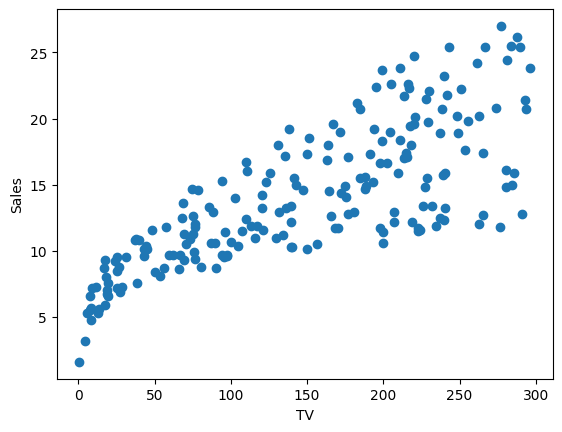

In [4]:
plt.scatter(x = 'TV', y = 'Sales', data = df)
plt.xlabel('TV')
plt.ylabel('Sales')

In [5]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [7]:
#First, build an scikit-learn model to compare with our own model

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
lr.predict(x_test.iloc[3].values.reshape(1,1))

C:\Users\siva1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.7420916])

Text(0, 0.5, 'Sales')

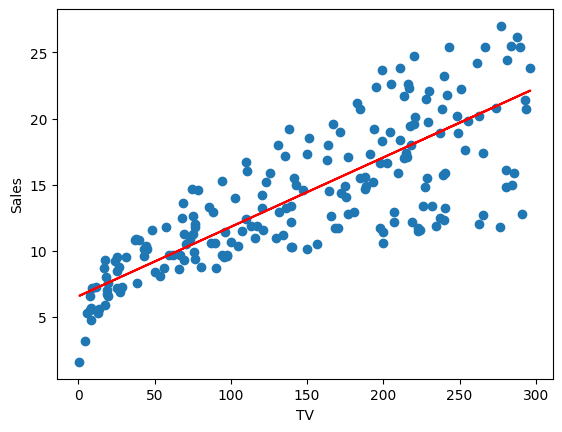

In [14]:
plt.scatter(x = 'TV', y = 'Sales', data = df)
plt.plot(x_train,lr.predict(x_train), color = 'red')
plt.xlabel('TV')
plt.ylabel('Sales')

In [15]:
lr.coef_

array([0.05245828])

In [16]:
lr.intercept_

6.566524608650465

In [17]:
class SimpleLinearRegression:
    def __init__ (self):
        self.m = None
        self.b = None
    def fit(self, x_train, y_train):
        nom = 0
        den = 0
        for i in range(x_train.shape[0]):
            nom = nom + (x_train.iloc[i] - x_train.mean()) * (y_train.iloc[i] - y_train.mean())
            den = den +  (x_train.iloc[i] - x_train.mean()) ** 2
        self.m = nom / den
        self.b = y_train.mean() - (self.m * x_train.mean())
        print(self.m)
        print(self.b)
    
    def predict(self, x_test):
        return ((self.m * x_test) + (self.b))
          

In [18]:
slr = SimpleLinearRegression()
slr.fit(x_train,y_train)

TV    0.052458
dtype: float64
TV    6.566525
dtype: float64


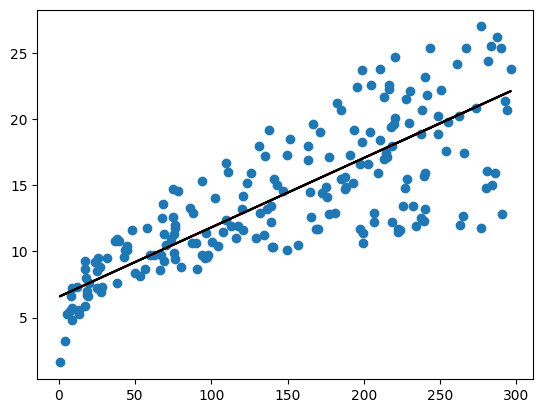

In [19]:
plt.scatter(x = 'TV', y = 'Sales', data = df)
plt.plot(x_train,lr.predict(x_train), color = 'red')
plt.plot(x_train,slr.predict(x_train), color = 'black')